**DATASET INFORMATION**

The data scientists at BigMart have collected 2013 sales data for 1559 product  across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**Loading the Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/Train.csv")

**Understanding the data**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Preprocessing the data**

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
#dropped item_id and outlet_id as its not required
df.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(df[i].value_counts())
    print('---------------------------')


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
---------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
---------------------------
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
---------------------------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
---------------------------
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarke

In [ ]:
df.isna().sum()

,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0
Item_Outlet_Sales,0


In [ ]:
df.drop(columns="Item_Weight",inplace=True)

In [ ]:
#filling the missing values
outlet_size_mode=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))

In [ ]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_val=df['Outlet_Size'].isnull()

In [ ]:
miss_val

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [ ]:
df.loc[miss_val,'Outlet_Size']=df.loc[miss_val,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [ ]:
df['Outlet_Size'].isnull().sum()

0

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
df['Outlet_Type']=df['Outlet_Type'].replace(['Supermarket Type3','Supermarket Type2','Supermarket Type1'],'Supermarket')

In [ ]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket,7440
Grocery Store,1083


**EDA**

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

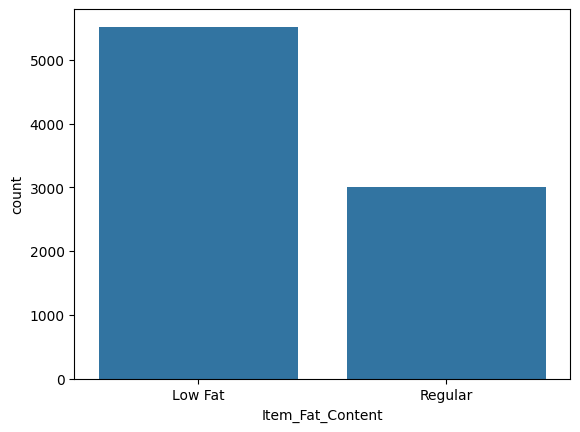

In [ ]:
import seaborn as sns
sns.countplot(x=df['Item_Fat_Content'])

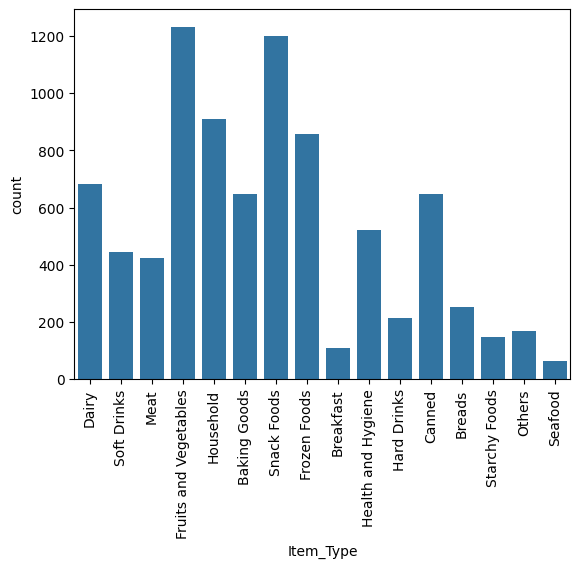

In [ ]:
sns.countplot(x=df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

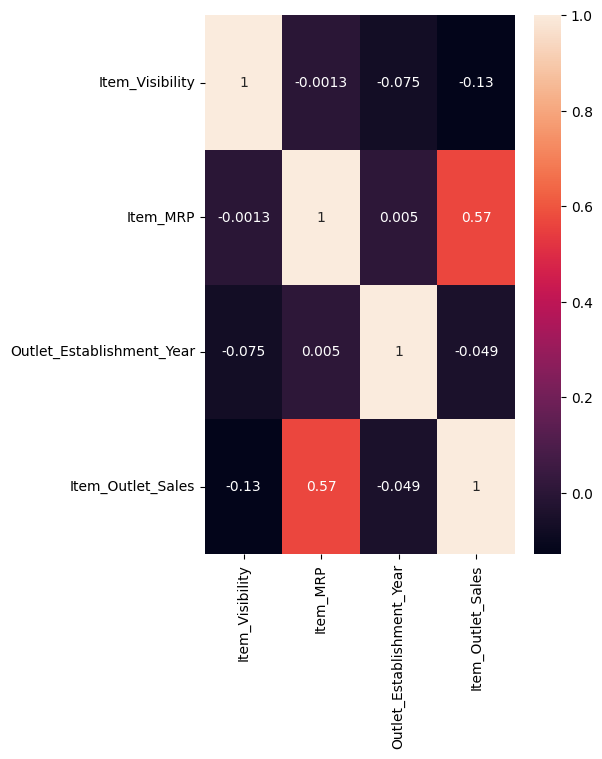

In [ ]:
plt.figure(figsize=(5,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
#here we are checking the correlation between dependant variable and independant

In [ ]:
df.corr(numeric_only=True)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
#since outlet establishment is not that correlated with item_outcome_sales,we are dropping it
df.drop(columns='Outlet_Establishment_Year',inplace=True)

<Axes: ylabel='Item_Visibility'>

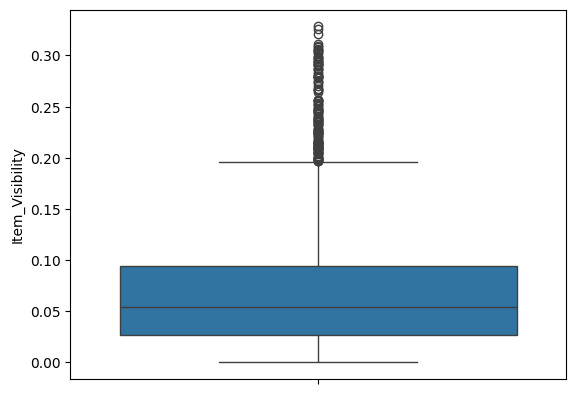

In [ ]:
sns.boxplot(df['Item_Visibility'])

In [ ]:
#removing outliers
q1=df['Item_Visibility'].quantile(0.25)
q3=df['Item_Visibility'].quantile(0.75)
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
df=df[(df['Item_Visibility']>=min_range)&(df['Item_Visibility']<=max_range)]
df.reset_index(drop=True,inplace=True)


<Axes: ylabel='Item_Visibility'>

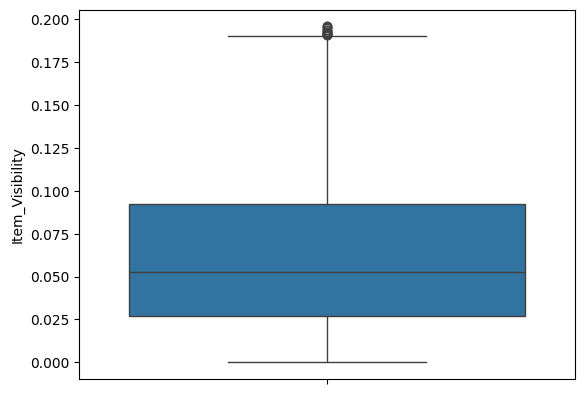

In [ ]:
sns.boxplot(df['Item_Visibility'])

In [ ]:
q1=df['Item_Visibility'].quantile(0.25)
q3=df['Item_Visibility'].quantile(0.75)
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
df=df[(df['Item_Visibility']>=min_range)&(df['Item_Visibility']<=max_range)]
df.reset_index(drop=True,inplace=True)

<Axes: ylabel='Item_Visibility'>

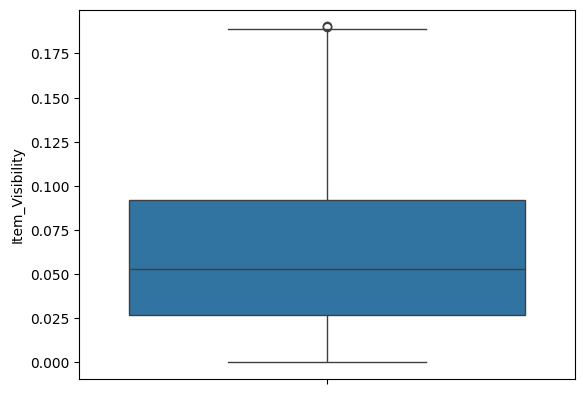

In [ ]:
sns.boxplot(df['Item_Visibility'])

In [ ]:
#Categorical to Numerical data Conversion using label encoder and onehot encoder
dict1={'label':[],'onehot':[]}
for i in df:
  if df[i].dtype=='object':
    if df[i].nunique()>2:
      dict1['onehot'].append(i)
    else:
      dict1['label'].append(i)





In [ ]:
dict1['label']

['Item_Fat_Content', 'Outlet_Type']

In [ ]:
le_objects={}
for col in dict1['label']:
  le_objects[col]=LabelEncoder()
  df[col]= le_objects[col].fit_transform(df[col])

In [ ]:
dict1['onehot']

['Item_Type', 'Outlet_Size', 'Outlet_Location_Type']

In [ ]:
onehot=OneHotEncoder(sparse_output=False,drop='first')
res=onehot.fit_transform(df[['Item_Type','Outlet_Size','Outlet_Location_Type']])


In [ ]:
res=pd.DataFrame(res,dtype='int')

In [ ]:
res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8361,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
8362,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
df1=df.copy()

In [ ]:
df1.drop(columns=['Item_Type','Outlet_Size','Outlet_Location_Type'],inplace=True)

In [ ]:
res.columns=[str(i) for i in range(19)]
res.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18'],
      dtype='object')

In [ ]:
df1=df1.join(res)

In [ ]:
df1.isna().sum()

,0
Item_Fat_Content,0
Item_Visibility,0
Item_MRP,0
Outlet_Type,0
Item_Outlet_Sales,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
df1

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,0,0.016047,249.8092,1,3735.1380,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.019278,48.2692,1,443.4228,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0.016760,141.6180,1,2097.2700,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.000000,182.0950,0,732.3800,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0.000000,53.8614,1,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,0,0.056783,214.5218,1,2778.3834,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8360,1,0.046982,108.1570,1,549.2850,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8361,0,0.035186,85.1224,1,1193.1136,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8362,1,0.145221,103.1332,1,1845.5976,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df1.dtypes

,0
Item_Fat_Content,int64
Item_Visibility,float64
Item_MRP,float64
Outlet_Type,int64
Item_Outlet_Sales,float64
0,int64
1,int64
2,int64
3,int64
4,int64


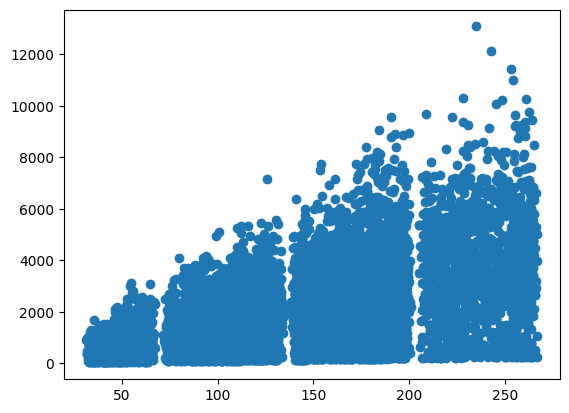

In [ ]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.show()

In [ ]:
#splitting the data

In [ ]:
x=df1.drop(columns='Item_Outlet_Sales')
y=df['Item_Outlet_Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
minmax=MinMaxScaler()
x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.fit_transform(x_test)

**model building**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
model.coef_

array([ 2.96098277e+01, -7.11753461e+01,  3.82553929e+03,  2.14489044e+03,
        3.17150090e+01, -4.43672982e+01,  3.72483993e+01, -1.73479942e+01,
       -2.65043237e+01,  2.45252073e+01, -2.53177160e+01, -3.60943146e+01,
       -2.21879784e+01,  6.08300399e+01, -1.09906707e+02,  2.08304073e+02,
       -1.08612620e+00, -8.02153740e+00,  7.75983636e+01,  5.33154786e+02,
        3.56601152e+02,  8.00384789e+01,  3.84224928e+02])

In [ ]:

model.intercept_

-1997.7382005310828

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2score",r2_score(y_test,y_pred))

MAE 882.7349398508459
RMSE 1174.2299641204233
R2score 0.4896746069828185


In [ ]:
poly=PolynomialFeatures(degree=2)
x_train_pol=poly.fit_transform(x_train_scaled)
x_test_pol=poly.fit_transform(x_test_scaled)

In [ ]:
model_pol=LinearRegression()
model_pol.fit(x_train_pol,y_train)

LinearRegression()

In [ ]:
y_pred_pol=model_pol.predict(x_test_pol)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_pol))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_pol)))
print("R2score",r2_score(y_test,y_pred_pol))

MAE 818.6211435346115
RMSE 1140.3206797115088
R2score 0.5187232717296157


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import
from sklearn.svm import SVDecisionTreeRegressorR
models=[KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),SVR()]
for i in models:
  i.fit(x_train_scaled,y_train)
  y_preds=i.predict(x_test_scaled)
  print(i)
  print("MAE",mean_absolute_error(y_test,y_preds))
  print("MSE",mean_squared_error(y_test,y_preds))
  print("R2score",r2_score(y_test,y_preds))
  print("--------------------------------")


KNeighborsRegressor()
MAE 916.2961356494023
MSE 1588692.5006139681
R2score 0.41199542239142783
--------------------------------
RandomForestRegressor()
MAE 874.5937314286853
MSE 1542028.0977145769
R2score 0.4292667839076487
--------------------------------
GradientBoostingRegressor()
MAE 814.9169338783776
MSE 1313102.1280208626
R2score 0.5139965337247869
--------------------------------
DecisionTreeRegressor()
MAE 1154.5621884462153
MSE 2777712.3145455327
R2score -0.028082876706011506
--------------------------------
SVR()
MAE 1251.4796211171006
MSE 2695993.1715063006
R2score 0.0021628946857135123
--------------------------------


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=5).mean()

0.49328962181621155

In [ ]:
cross_val_score(GradientBoostingRegressor(),x,y,cv=5).mean()

0.5157077608771503

In [ ]:
#we are choosing GradientBoostingRegressor as our final model as it is showing  R2score :0.5139

hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'learning_rate':[0.0001,0.001,0.01,0.1],
            'max_depth': [i for i in range(3,10)],
            'n_estimators':[i for i in range(10,100,10)],
            'min_samples_split':[i for i in range(2,15,2)]}
rs_cv=RandomizedSearchCV(GradientBoostingRegressor(),parameters,cv=5,n_iter=7)
rs_cv.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=7,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]})

In [ ]:
rs_cv.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'max_depth': 4,
 'learning_rate': 0.1}

In [ ]:
rs_cv.best_score_

0.5190880696576808

In [ ]:
result=rs_cv.best_estimator_

In [ ]:
best_y_pred=result.predict(x_test_scaled)

In [ ]:
print("MAE",mean_absolute_error(y_test,best_y_pred))
print("MSE",mean_squared_error(y_test,best_y_pred))
print("R2score",r2_score(y_test,best_y_pred))
print("--------------------------------")

MAE 813.3732153000378
MSE 1308612.7869971655
R2score 0.515658122151345
--------------------------------


In [ ]:
#TESTING

In [ ]:
df1

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,0,0.016047,249.8092,1,3735.1380,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.019278,48.2692,1,443.4228,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0.016760,141.6180,1,2097.2700,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.000000,182.0950,0,732.3800,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0.000000,53.8614,1,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,0,0.056783,214.5218,1,2778.3834,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8360,1,0.046982,108.1570,1,549.2850,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8361,0,0.035186,85.1224,1,1193.1136,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8362,1,0.145221,103.1332,1,1845.5976,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df2=df1.copy()

In [ ]:
xtry=df2.drop(columns="Item_Outlet_Sales")

In [ ]:
xtry

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,0.016047,249.8092,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.019278,48.2692,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0.016760,141.6180,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.000000,182.0950,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0.000000,53.8614,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,0,0.056783,214.5218,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8360,1,0.046982,108.1570,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8361,0,0.035186,85.1224,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8362,1,0.145221,103.1332,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
result.predict([xtry.iloc[0]])
# our model predicted the price for itemtype diary priced RS 249.80 .

array([3648.04861263])